# Evaluating the performance of linear regression models using ResidualPlots
Since our model uses multiple explanatory variables, we can't visualize the linear regression line (or hyperplane to be precise) in a two-dimensional plot, but we can plot the residuals (the differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model. Those residual plots are a commonly used graphical analysis for:
<ol>
<li>diagnosing regression models to detect nonlinearity
<li> detect outliers
<li> to check if the errors are randomly distributed.
</ol>

# First fit LR

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 
             'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X = df[['RM']].values
X = X.reshape(X.shape[0], -1)
y = df['MEDV'].values
y = y.reshape(y.shape[0], -1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Plot Residual plot

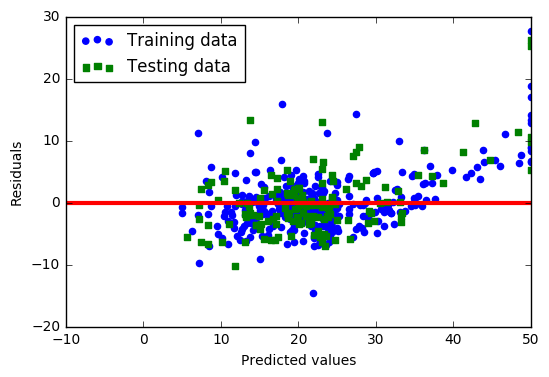

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train - y_train_pred, color='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test - y_test_pred, color='green', marker='s', label='Testing data')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=3, color='red')
plt.xlim(-10, 50)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Analysis of ResidualPlot
<ol>
<li>In the case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications.
<li> However, for a good regression model, we would expect that the errors are randomly distributed and the residuals should be randomly scattered around the centerline.
<li> If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which is leaked into the residuals as we can slightly see in our preceding residual plot. 
<li> Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.
</ol>

# Mean Squared Error  (MSE)
Another useful quantitative measure of a model's performance is the so-called Mean Squared Error (MSE), which is simply the average value of the SSE cost function that we minimize to fit the linear regression model. The MSE is useful to for comparing different regression models or for tuning their parameters via a grid search and cross-validation:

In [12]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


# Analysis of MSE
We will see that the MSE on the training set is 19.96, and the MSE of the test set is much larger with a value of 27.20, which is an indicator that our model is overfitting the training data.

# R^2 [R2_score]
= 1 - (MSE/Var(y))
<li>For a perfect model, MSE = 0 and R^2 = 1
<li> For the training dataset, R^2 is bounded between 0 and 1, but it can become negative for the test set. 


In [13]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
      (r2_score(y_train, y_train_pred),
      r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [ ]:
Q&A:
    How to analyse R^2 score